In [93]:
import pandas as pd

# Load the data
file_path = 'results_temp/comparison_fixedy_200.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe and a summary of the data
pd.set_option('display.max_rows', 24)

data


,IpwEpsGreedy,IpwBootTS,RandomAction,eps_greedy_policy,eps_greedy_value,optimal_outcome_actions,opt_policy_index,opt_policy_value,optimal_outcome_policy
0,1349.006002,1560.813332,1599.546449,35,35.168160,1982.715245,58,36.718671,1699.772415
1,1538.893297,1759.710272,1417.385253,35,35.168160,2197.563964,58,36.718671,1797.624675
2,1528.196183,1721.986723,1357.906663,68,34.399841,2045.366617,58,36.718671,1857.403744
3,1865.759399,1949.654749,1468.575508,58,36.718671,2158.984374,58,36.718671,1946.904839
4,1492.821582,1571.534390,1291.878736,35,35.168160,2123.642469,58,36.718671,1946.781015
...,...,...,...,...,...,...,...,...,...
108,1985.251315,1835.424739,1373.495381,58,36.718671,2137.482762,58,36.718671,1835.424739
109,2118.668091,1640.007101,1330.043540,58,36.718671,2037.551838,58,36.718671,1767.772288
110,1550.289482,1821.998664,1295.004416,58,36.718671,2067.175043,58,36.718671,1767.349347
111,1824.298775,1867.823442,1188.591274,68,34.399841,2117.870434,58,36.718671,1867.823442


In [94]:
# Create new "regret" columns by subtracting other columns from "optimal_outcome_actions"
for column in data.columns:
    if column not in ['optimal_outcome_actions', 'optimal_outcome_policy', 'eps_greedy_policy', 'optimal_policy', "opt_policy_index", "eps_greedy_value", "opt_policy_value"]:
        data[f'regret_{column}'] = data['optimal_outcome_policy'] - data[column]

# Calculate the accumulative regret for each "regret" column
for column in data.columns:
    if 'regret_' in column:
        data[f'accumulative_{column}'] = data[column].cumsum()

# Display the first few rows of the modified dataframe to verify the new columns
data = data.iloc[:101]
data.head()


,IpwEpsGreedy,IpwBootTS,RandomAction,eps_greedy_policy,eps_greedy_value,optimal_outcome_actions,opt_policy_index,opt_policy_value,optimal_outcome_policy,regret_IpwEpsGreedy,regret_IpwBootTS,regret_RandomAction,accumulative_regret_IpwEpsGreedy,accumulative_regret_IpwBootTS,accumulative_regret_RandomAction
0,1349.006002,1560.813332,1599.546449,35,35.168160,1982.715245,58,36.718671,1699.772415,350.766413,138.959082,100.225966,350.766413,138.959082,100.225966
1,1538.893297,1759.710272,1417.385253,35,35.168160,2197.563964,58,36.718671,1797.624675,258.731378,37.914403,380.239422,609.497790,176.873485,480.465387
2,1528.196183,1721.986723,1357.906663,68,34.399841,2045.366617,58,36.718671,1857.403744,329.207561,135.417021,499.497081,938.705351,312.290506,979.962469
3,1865.759399,1949.654749,1468.575508,58,36.718671,2158.984374,58,36.718671,1946.904839,81.145439,-2.749910,478.329330,1019.850791,309.540596,1458.291799
4,1492.821582,1571.534390,1291.878736,35,35.168160,2123.642469,58,36.718671,1946.781015,453.959433,375.246625,654.902279,1473.810224,684.787221,2113.194078


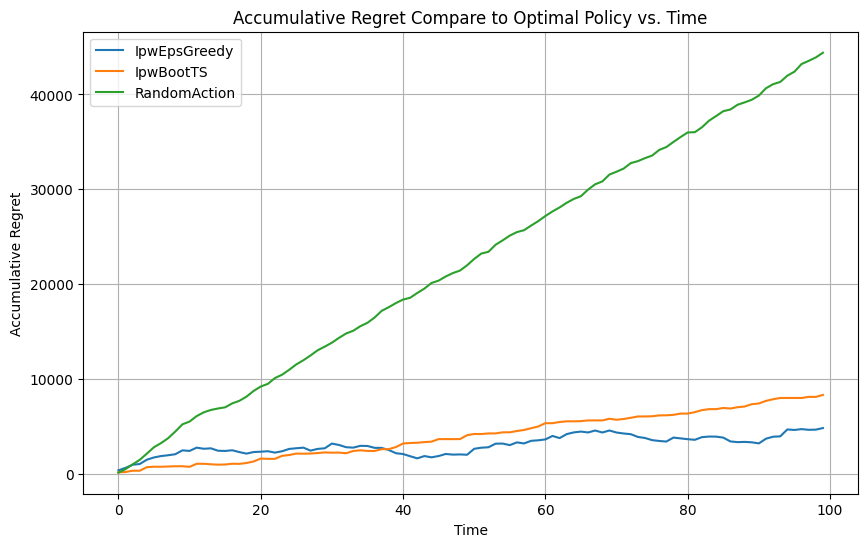

In [95]:
import matplotlib.pyplot as plt

# Plot accumulative regret vs. time (index)
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate over columns to plot accumulative regret for each relevant column
for column in data.columns:
    if 'accumulative_regret_' in column:
        ax.plot(data.index, data[column], label=column.replace('accumulative_regret_', ''))

ax.set_xlabel('Time')
ax.set_ylabel('Accumulative Regret')
ax.set_title('Accumulative Regret Compare to Optimal Policy vs. Time')
ax.legend()

plt.grid(True)
plt.show()


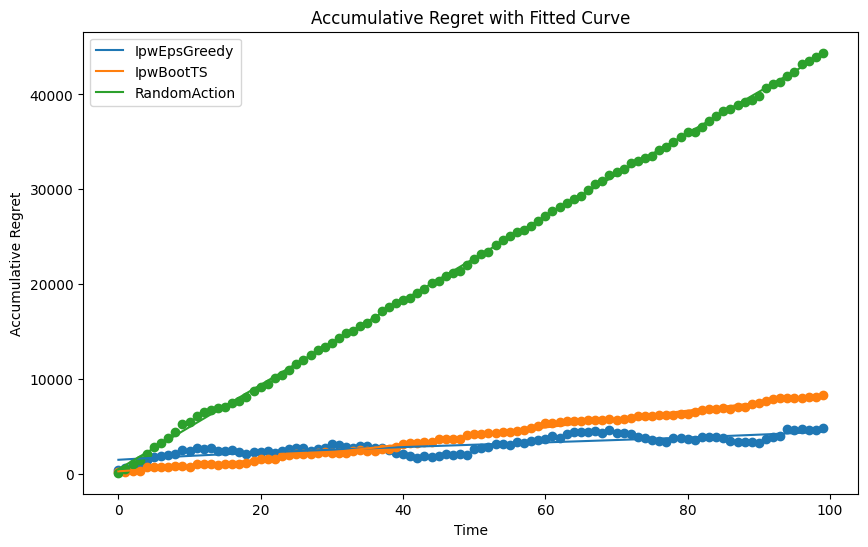

In [96]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Define the time index as x
x = np.arange(len(data))

# Define a function to fit the curve, using a polynomial function for simplicity
def poly_func(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

# Fit the curve

plt.figure(figsize=(10, 6))

# Iterate over columns to plot accumulative regret for each relevant column
for column in data.columns:
    if 'accumulative_regret_' in column:
        y = data[column].values
        params, params_covariance = curve_fit(poly_func, x, y)
        plt.scatter(x, y)
        plt.plot(x, poly_func(x, *params), label=column.replace('accumulative_regret_', ''))

# Plot the original data and the fitted curve


plt.title('Accumulative Regret with Fitted Curve')
plt.xlabel('Time')
plt.ylabel('Accumulative Regret')
plt.legend()
plt.show()
